<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-106/blob/main/Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

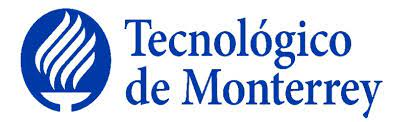
# Maestria: Inteligencia artificial aplicada (MNA)
# Materia:Ciencia Y Analítica de Datos 
# Alumnos: 
#* A01793036 - Julian Gongora
#* A01793052 - Juan Lopez
# Profesor Titular:Jobish Vallikavungal Devassia
# Profesor Tutor: Victoria Guerrero Orozco
# Equipo: Equipo 106
# Actividad Semanal - 4.

**1. Objetivo**: Realizar la reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.

1.1. Descripcion del data Set: 

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


1.2. Informacion de los atributos:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others.

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;X7 = the repayment status in August, 2005; . . .; X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


1.3. Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



1.4. Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480

**2.Limpieza de Datos:** A continuación se ejecuta la limpieza de datos de la base por medio del metodo de eliminación con el comando Dropna. Se elimina el 0.014% de las filas y se considera una perdida aceptable para continuar: 

In [2]:
#Carga de librerias
import pandas as pd
import numpy as np
#Se carga la base de datos en la variable imput.
input="https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv" 

In [3]:
clientes_df=pd.read_csv(input) # se pasa la base de datos del link al data frame clientes
df =clientes_df.copy() # se crea una copia de los datos por si necesitaramos los originales mas adelante.
df.dropna(inplace = True) # aplicamos un dropna para eliminar las filas que contengan valores NAN como se reviso en la actividad de la semana3 se vio que era la solucion de limpieza mas adecuada.
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


**3. Se identifica el tipo de variables** que existen en la base de datos, para identificar que informacion es cuantitativa y aporta al proceso de analisis: 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

**3.1.** Se observa que la mayoria de variables son numericas. Sin embargo, se identifican 6 variables categóricas como:

* ID, 
* X2: Gender (1 = male; 2 = female)
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others.
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X6 - X12: History of past payment (-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months;)
* Y: Salida del sistema

**3.2**: Es necesario eliminar estas variables categoricas, ya que la técnica PCA solo trabaja con variables continuas y no
categóricas.


In [5]:
# Con el siguiente codigo procedemos a crear un nuevo data frame que solo contenga 
#las variables que son continuas y eliminando las variables categoricas mencionadas arriba.
df_colX1=df[['X1', 'X5']] # Se crea un data frame con las comulnas X1 y X5
df_colX12X23=df.iloc[:,12:24] # Se crea un data fram con las columas X12 a X23.
df_num=df_colX1.join(df_colX12X23) # Se juntan ambos data frame para crear uno nuevo con solo las columnas continuas

df_num.head() # mostramos las primeras 5 columnas.

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


**3.4** Procedemos a revisar la correlacion de las variables continuas que tienen entre si. Sin embargo, a simple vista es dificil identificar que correlaciones resaltan, así que presentamos un mapa de calor, para faciliar la tarea.

In [6]:

df_num.corr() 

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
X5,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
X12,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
X13,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
X14,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
X15,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
X16,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
X17,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
X18,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
X19,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


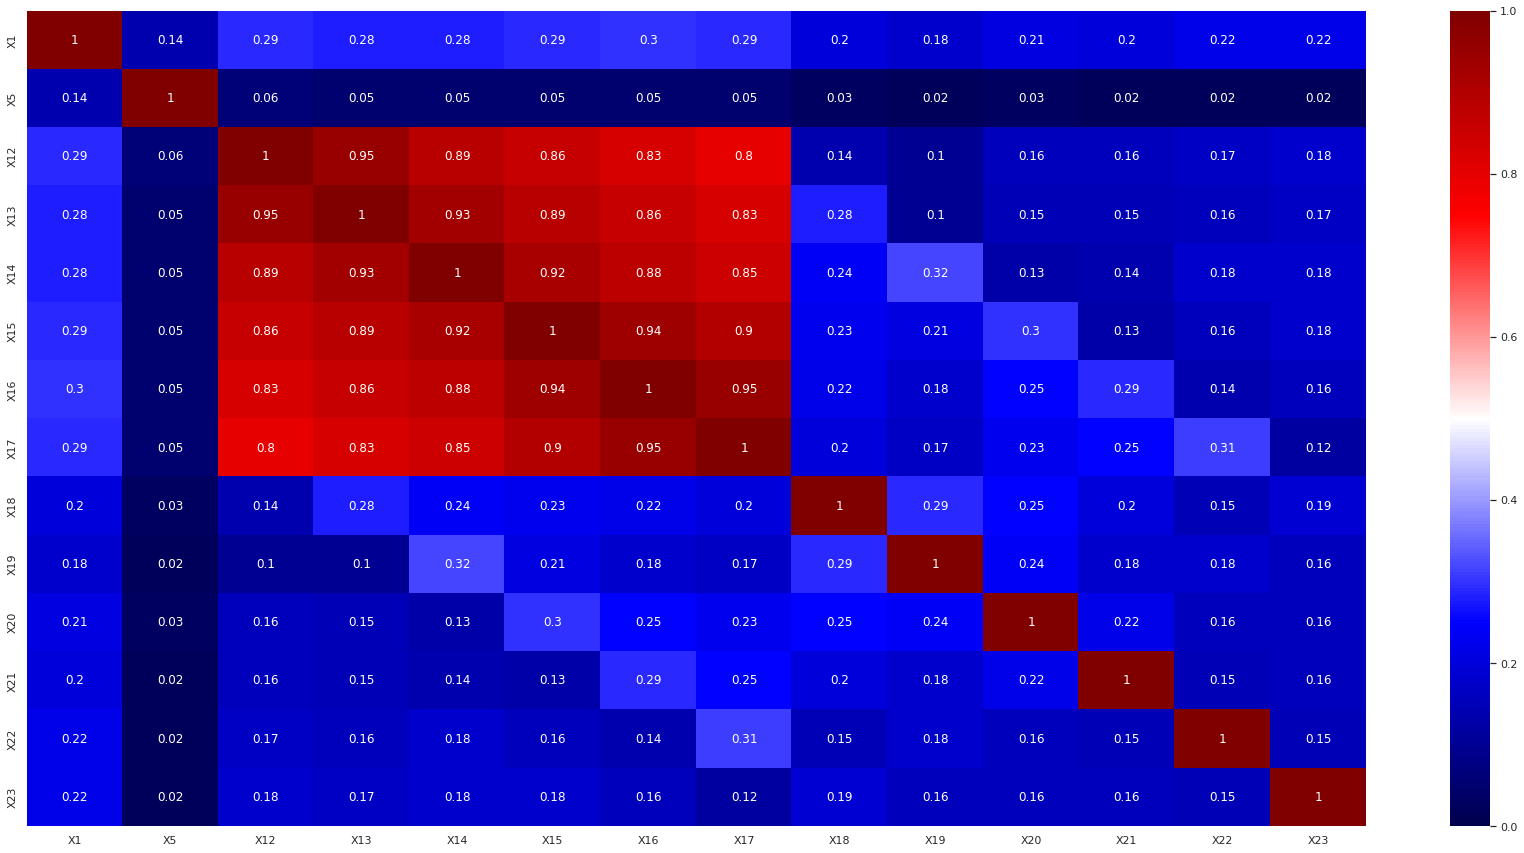

In [11]:
# Se procede hacer un heat map para visualizar mejor la correlacion
import seaborn as sns
corrs = df_num.corr().round(2)
sns.set(rc = {'figure.figsize':(30,15)})
sns.heatmap(corrs, vmin = 0, vmax = 1, cmap = "seismic", annot= True)

**3.5 Análisis de varianza:** Se observa que que hay varibles altamente correlacionas lo que indica que hay oportunidad de simplificar la base. Para ello vamos a analizar la varianza 

In [15]:
# hacemos una analisis de varianzas de algunas columnas.
cols =['X1','X5','X12']
summary = {
  "Varianzas": df_num[cols].var(),
  "Valor Min": df_num[cols].min(),
  "Valor Max": df_num[cols].max()
}
pd.DataFrame(summary, index=cols).transpose()

,X1,X5,X12
Varianzas,1.683177e+10,84.903672,5.427998e+09
Valor Min,1.000000e+04,21.000000,-1.655800e+05
Valor Max,1.000000e+06,79.000000,9.645110e+05


**4. Normalización de datos:** Los datos obtenidos contienen características de varias dimensiones y escalas en total. Las diferentes escalas de las características de los datos afectan negativamente al modelado de un conjunto de datos. Las varianzas de los valores sin ninguna transformacion o normalizacion son muy distintas y puede afectar a la tecnica PCA ya que utiliza las varianzas.

In [16]:
# Procedemos a realizar una Estandarización: cambia la escala de un conjunto de datos para que tenga una media de 0 y una desviación estándar de 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled, columns=df_num.columns)
scaled_df.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


**4.1 Verificación:** Observamos que todas las varianzas quedan en 1 despues de la transformacion.

In [17]:
# Revisamos las varianzas ahora con esta Standardization y vemos que las varianzas estan dentro de un rango de 1
summary = {
"Varianzas": scaled_df[cols].var(),
"Valor Min": scaled_df[cols].min(),
"Valor Max": scaled_df[cols].max()
}
pd.DataFrame(summary, index = cols).transpose()

,X1,X5,X12
Varianzas,1.000033,1.000033,1.000033
Valor Min,-1.214443,-1.571867,-2.943086
Valor Max,6.416489,4.722789,12.396047


**5. Reducción de la dimensionalidad:**  A continuación se procede con la reducción de datos con el objetivo de obtener una representación reducida de un conjunto de datos pero que aún contiene información crítica.

In [18]:
#Procedemos a implementar el PCA con los datos transformados en el data frame Scaled_df
from sklearn.decomposition import PCA
pcs = PCA()
pcs_t = pcs.fit_transform(scaled_df)

In [19]:
# Revisaremos la varianza explicada y la varianza acumulada por cada componente.
pcsSummary_df = pd.DataFrame({
  '% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
  '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


Solo agregaremos etiquetas a las componentes para poder entenderlas bien.

In [20]:
#Agregaremos etiquetas PC para cada componente de la tabla de arriba
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


**5.1. Analisis Reducción:** 
- Analizando la siguiente tabla observamos que alrededor del 91.91 % de la variación se ve explicada por los primeros 8 componentes.
- En contra posicion se requiere unas 14 variables para llegar un 92%. Que es comparable con los 8 componentes seleccionados.

In [21]:
# Revisaremos cuantas variables necesitamos para explicar el 90% de la varianza con las variables originales pero escaladas.
total_var =scaled_df.var().sum()
pd.DataFrame({"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,7.142857,7.142857
X5,7.142857,14.285714
X12,7.142857,21.428571
X13,7.142857,28.571429
X14,7.142857,35.714286
X15,7.142857,42.857143
X16,7.142857,50.000000
X17,7.142857,57.142857
X18,7.142857,64.285714
X19,7.142857,71.428571


Para este casi para explicar el 90% de la varianza necesitamos 13 variables comparado con 8 componentes que necesitamos en el PCA

In [ ]:
comps_df = pd.DataFrame(pcs.components_.round(4), # pcs.components nos da los pesos de cada uno de␣ los componentes
  columns = pcs_df.columns, #Son 13 columnas, las cuales hacen referencia a␣ cada uno de los componentes: PC1, PC2...PC13
  index = scaled_df.columns) #Las filas son 13 también, las cuales hacen␣ referencia a las variables originales
#Recuerda, el código siguiente dice que me de todas las filas pero solo las␣ primeras 8 columnas
#La estructura es [filas, columnas]
comps_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
X1,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885,0.3807
X5,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059,-0.0942
X12,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339,0.0185
X13,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396,-0.0706
X14,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068,-0.1650
X15,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993,0.0693
X16,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076,0.0079
X17,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498,-0.0003
X18,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237,0.0587
X19,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200,-0.4889


#**Paso 1: número mínimo de componentes principales**
**Como análisis del los cálculos anterores, se determina que el  número mínimo de componentes principales que representan la mayor parte de la variación en sus dato es: 8.**

Los primeros 8 componentes representan el 91,1% de la varianza. Lo cual se considera una tasa aceptable.

#**Paso 2: Interprete cada componente principal en términos de las variables originales**

Examine la magnitud y la dirección de los coeficientes de las variables originales.

**6. Análisis de coeficientes de las variables originales:** Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
#Analizaremos el peso maximo de cada componente 
comps_df.iloc[:,:8].abs().idxmax()

PC1    X18
PC2    X12
PC3    X19
PC4    X23
PC5    X23
PC6    X20
PC7    X22
PC8    X20
dtype: object

In [ ]:
#Analizaremos el peso minimo de cada componente 
comps_df.iloc[:,:8].abs().idxmin()

PC1    X22
PC2    X20
PC3    X16
PC4    X12
PC5    X18
PC6    X15
PC7    X16
PC8    X17
dtype: object

**6.1. Resultados:** Para las 8 componentes seleccionadas se observa lo siguiente:
* PC1 --> X18 es mas importante y X22  es el menos importante.
* PC2 --> X12 es mas importante y X20 es el menos importante.
* PC3 --> X19 es mas importante  y X16 es el menos importante.
* PC4 --> X23 es mas importante  y X12 es el menos importante.
* PC5 --> X23 es mas importante  y X18 es el menos importante.
* PC6 --> X20 es mas importante  y X15 es el menos importante.
* PC7 --> X22 es mas importante  y X16 es el menos importante.
* PC8 --> X20 es mas importante  y X17 es el menos importante.

#**Paso 3: Identifique valores atípicos**

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

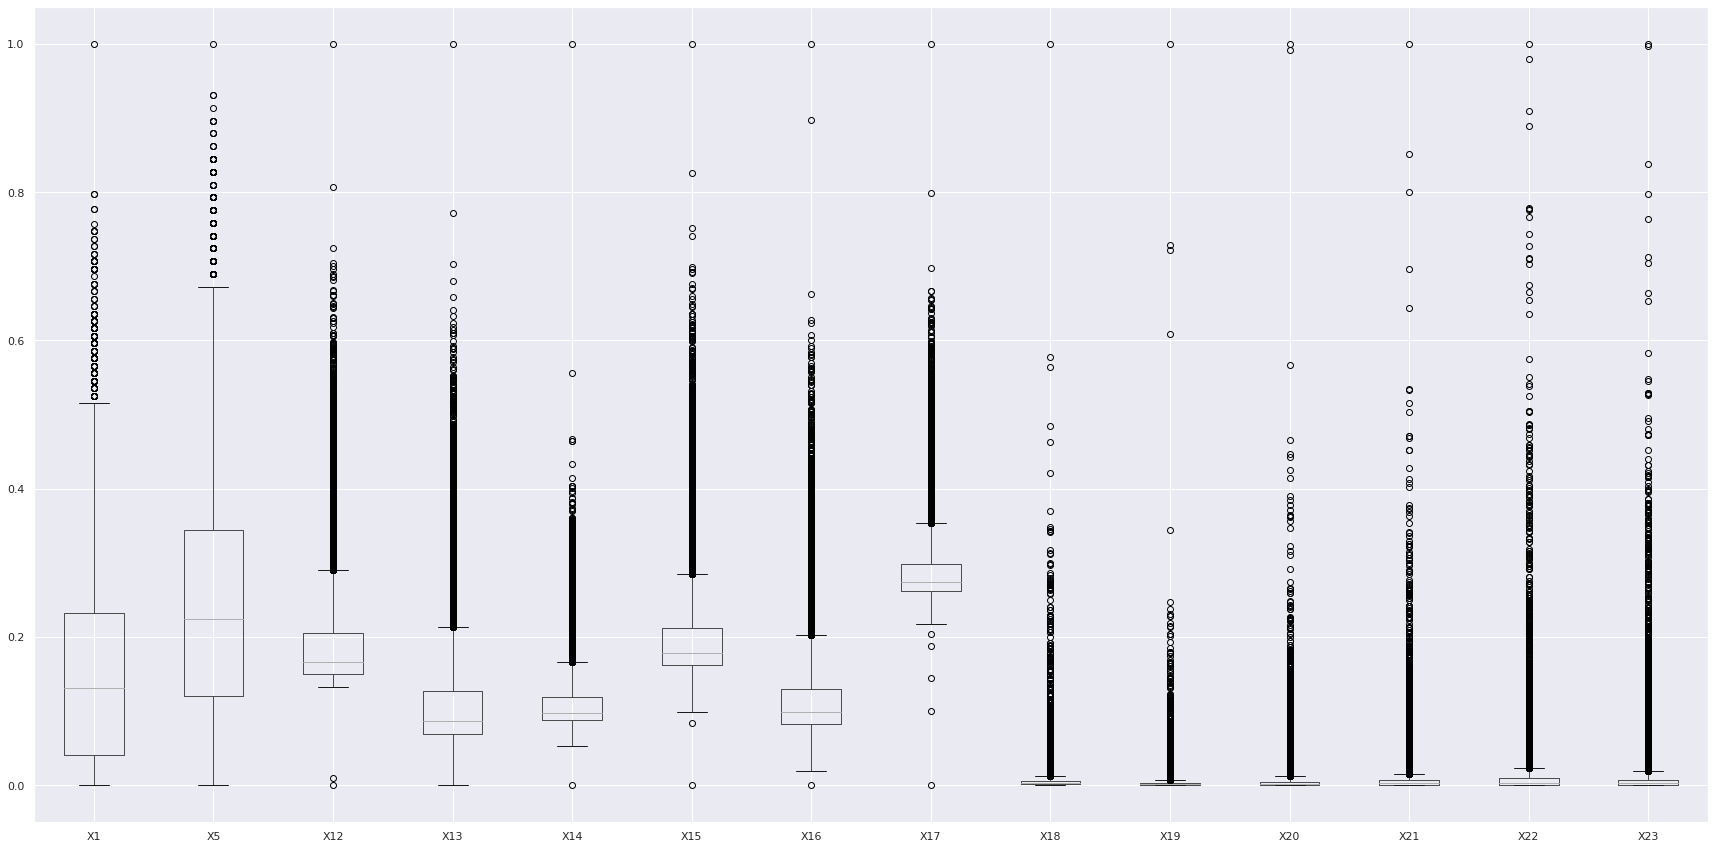

In [ ]:
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler().fit(df_num)
#scaler

Maxmin = scaler.fit_transform(df_num)
Maxmin_df = pd.DataFrame(Maxmin, columns=df_num.columns)
Maxmin_df.boxplot()

# Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

>¿Cuál es el número de componentes mínimo y por qué?

* **RTA: El numero mínimo de componentes a usar es 8 ya que con ellas explicamos el 91.1% de la varianza acumulada.**

>¿Cuál es la variación de los datos que representan esos componentes?

* **RTA: Estas componentes representan el 91.1% de la variación.**

>¿Cuál es la pérdida de información después de realizar PCA?
* **RTA: Se estima un 8.9%.  Se pierde la información que es redúndate y esta correlacionada.**

>De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
* **RTA: De acuerdo con el análisis la componente PC1 representa el 42.28	% de la varianza y la variable original que tiene más peso es la X18 (amount paid in September).**

> ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
* **RTA: Cuando tenemos demasiadas variables que analizar y Cuando tenemos variables correlacionadas. Serafeim Loukas afirma que "PCA es particularmente útil en el procesamiento de datos donde existe multicolinealidad entre las características/variables.
PCA se puede utilizar cuando las dimensiones de las características de entrada son altas (por ejemplo, muchas variables). PCA también se puede utilizar para la eliminación de ruido y la compresión de datos."**